In [96]:
# pip install pyproj

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Create Data 
* Correcting involved_markers_hebrew
* Create data for TA
* Convert and Create latitude and longitude to EPSG 32636
* Map to make sure accident in the align to BP
* Correcting BP data

In [97]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display

import pyproj

## Loading **involved_markers_hebrew** and Fixing:
* Date
* Dropping columns

In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display


In [ ]:
i_m_h = pd.read_csv('./csv_tables/original_csv_tables/involved_markers_hebrew.csv')

C:\Users\itay8\AppData\Local\Temp\ipykernel_19100\1916716407.py:1: DtypeWarning: Columns (151) have mixed types. Specify dtype option on import or set low_memory=False.
  i_m_h = pd.read_csv('./csv_tables/original_csv_tables/involved_markers_hebrew.csv')


Fixing Date

In [ ]:
i_m_h['accident_date'] = pd.to_datetime(
    i_m_h['accident_year'].astype(str) + '-' + 
    i_m_h['accident_month'].astype(str) + '-' + 
    i_m_h['accident_day'].astype(str) + ' ' + 
    i_m_h['accident_hour'].astype(str) + ':' + 
    i_m_h['accident_minute'].astype(str)
)

Dropping duplicated columns

In [ ]:
i_m_h.drop(columns=['vehicle_vehicle_type','vehicle_vehicle_type_hebrew'], inplace=True)

In [ ]:
i_m_h.to_csv('./csv_tables/involved_markers_hebrew_corrected.csv', index=False)

## Create TA Data



In [ ]:
i_m_h = pd.read_csv('./csv_tables/involved_markers_hebrew_corrected.csv')

C:\Users\itay8\AppData\Local\Temp\ipykernel_2940\3865934326.py:1: DtypeWarning: Columns (151) have mixed types. Specify dtype option on import or set low_memory=False.
  i_m_h = pd.read_csv('./csv_tables/involved_markers_hebrew_corrected.csv')


In [ ]:
i_m_h[i_m_h.accident_yishuv_symbol == 5000].copy().to_csv('./csv_tables/i_m_h_ta.csv', index=False)

## Converting Latitude and Longitude to EPSG 32636

In [98]:
i_m_h_ta = pd.read_csv('./csv_tables/i_m_h_ta.csv')
i_m_h_ta

C:\Users\itay8\AppData\Local\Temp\ipykernel_11308\1775048707.py:1: DtypeWarning: Columns (44,151) have mixed types. Specify dtype option on import or set low_memory=False.
  i_m_h_ta = pd.read_csv('./csv_tables/i_m_h_ta.csv')


,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_status,vehicle_status_hebrew,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,accident_date
0,2013001076,32013001076,3,3,1,נהג,2010,13,60-64,1,...,0.0,NaN,1.0,ישראלי,3.0,1.0,עד 1.9,4.0,אין נזק,2013-09-07 00:30:00
1,2013001885,32013001885,3,3,2,נהג נפגע,2003,7,30-34,1,...,0.0,NaN,1.0,ישראלי,1.0,NaN,NaN,4.0,אין נזק,2013-11-02 01:45:00
2,2013000001,12013000001,1,1,3,נפגע,0,12,55-59,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-02 00:00:00
3,2013002115,32013002115,3,3,1,נהג,0,99,לא ידוע,0,...,0.0,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,1.0,קל,2013-04-16 02:15:00
4,2013000005,12013000005,1,1,1,נהג,2006,10,45-49,1,...,0.0,NaN,1.0,ישראלי,35.0,11.0,16.0-19.0,4.0,אין נזק,2013-01-09 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107196,2023098840,32023098840,3,3,3,נפגע,0,7,30-34,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-13 20:45:00
107197,2023098343,12023098343,1,1,1,נהג,2015,6,25-29,2,...,0.0,NaN,1.0,ישראלי,99.0,1.0,עד 1.9,4.0,אין נזק,2023-02-07 15:45:00
107198,2023097423,32023097423,3,3,1,נהג,2019,5,20-24,1,...,0.0,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2023-06-20 09:00:00
107199,2023099879,12023099879,1,1,3,נפגע,0,15,70-74,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-20 13:15:00


In [101]:
wgs_legion = pyproj.Transformer.from_crs('EPSG: 4326', 'EPSG:32636')


correct_epsg = []
for row in i_m_h_ta.iterrows():
    legion = wgs_legion.transform(row[1]['latitude'], row[1]['longitude'])
    correct_epsg.append(Point(legion))

i_m_h_ta_gdf = gpd.GeoDataFrame(
    i_m_h_ta,
    geometry=correct_epsg
)

i_m_h_ta_gdf.set_crs(epsg=32636)
i_m_h_ta_gdf.crs

## Map to make sure accidents are in the correct place

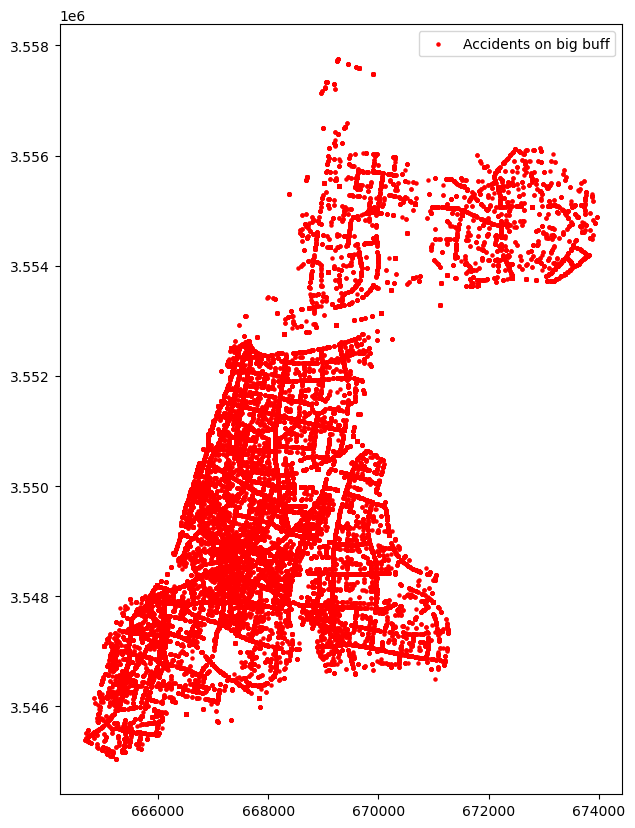

In [102]:
fig, ax = plt.subplots(figsize=(10, 10))

i_m_h_ta_gdf.plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )

plt.legend()
plt.show()

## Making sure TA Bicycle Path Aligns with i_m_h_ta_gdf

In [103]:
# Load the BP
bicycle_paths = gpd.read_file("./csv_tables/tel_avlv_bycicle_UTM_20240818_005147/Bicycle Routes.shp")

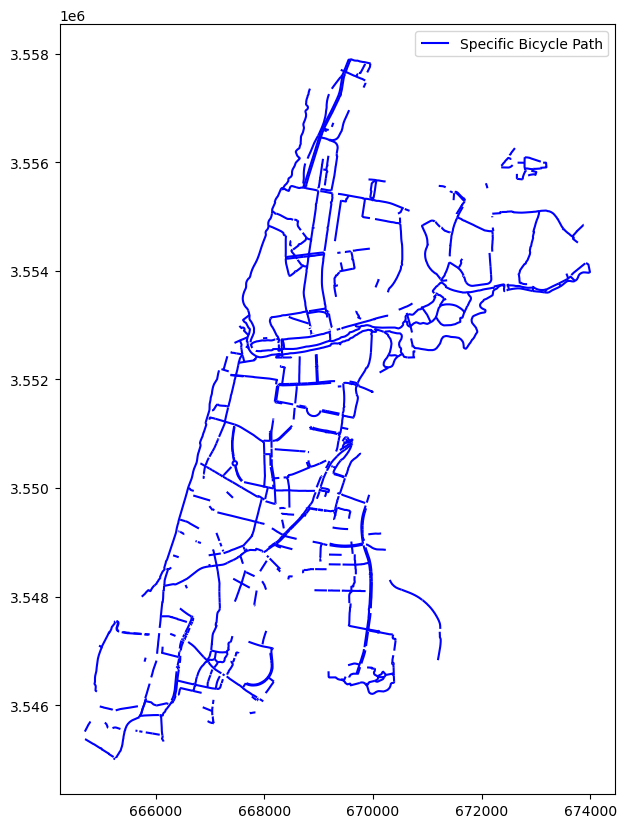

In [104]:
fig, ax = plt.subplots(figsize=(10, 10))

bicycle_paths.plot(ax=ax, color='blue', label='Specific Bicycle Path')

plt.legend()
plt.show()

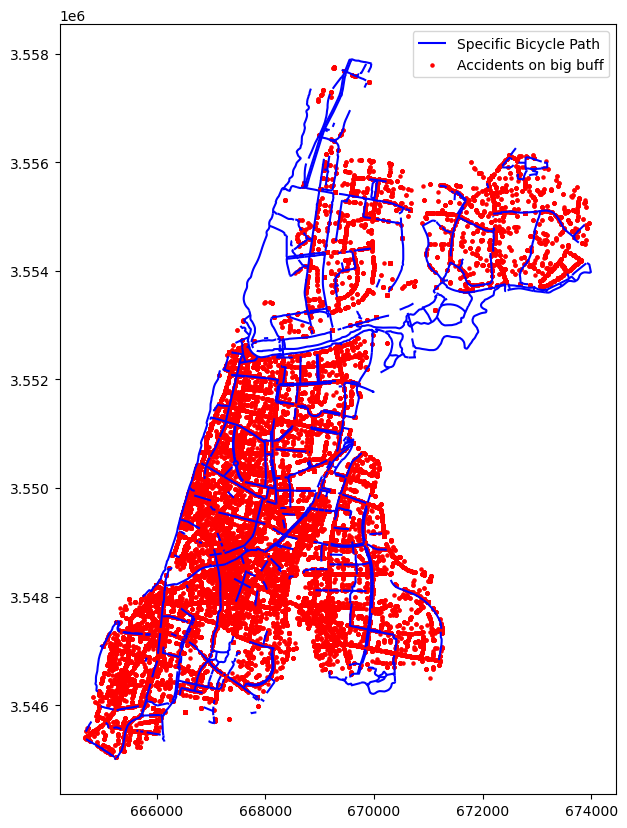

In [105]:
fig, ax = plt.subplots(figsize=(10, 10))

bicycle_paths.plot(ax=ax, color='blue', label='Specific Bicycle Path')
i_m_h_ta_gdf.plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )


plt.legend()
plt.show()

## Create Micro Mobility Data

In [106]:
BICYCLE = 15
SCOOTER = 21
E_BICYCLE = 23

micro_m = [SCOOTER, E_BICYCLE, BICYCLE]

In [107]:
i_m_h_ta_gdf[(i_m_h_ta_gdf.involve_vehicle_type.isin(micro_m))].head()

,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_status_hebrew,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,accident_date,geometry
23,2013001368,32013001368,3,3,2,נהג נפגע,0,6,25-29,1,...,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2013-07-27 01:00:00,POINT (667544.749 3549959.961)
87,2013001742,32013001742,3,3,2,נהג נפגע,0,7,30-34,2,...,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2013-10-07 01:30:00,POINT (667286.918 3548726.540)
117,2013001350,12013001350,1,1,2,נהג נפגע,0,5,20-24,1,...,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2013-08-25 01:00:00,POINT (667023.688 3548785.170)
246,2013007702,32013007702,3,3,2,נהג נפגע,0,9,40-44,1,...,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2013-08-25 07:45:00,POINT (668208.194 3551605.730)
259,2013009458,12013009458,1,1,2,נהג נפגע,0,15,70-74,1,...,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2013-06-10 08:00:00,POINT (668377.428 3549148.873)


In [108]:
i_m_h_ta_gdf[(i_m_h_ta_gdf.involve_vehicle_type.isin(micro_m))].to_parquet('./csv_tables/i_m_h_ta_mm_gdf.parquet')

In [109]:
i_m_h_ta_gdf.to_parquet('./csv_tables/i_m_h_ta_gdf.parquet')

## Correcting Bicycle Paths

* Merge with meta data

In [110]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display


In [111]:
import geopandas as gpd

# Load the shapefile
bicycle_paths = gpd.read_file("./csv_tables/tel_avlv_bycicle_UTM_20240818_005147/Bicycle Routes.shp")
bicycle_paths.columns = ['oid_shvil', 'msorech', 'dateimport', 'width', 'direction', 'create_year',
                         'shemmikta', 'miflas', 'create_date', 'geometry']
bicycle_paths.create_year = bicycle_paths.create_year.fillna(-1).astype(int)
bicycle_paths
# changing col names to fit other dataframes 
bicycle_paths.oid_shvil = pd.to_numeric(bicycle_paths.oid_shvil, downcast='integer')
# bicycle_paths.crs
bicycle_paths
# bicycle_paths['street_name'] = clean_st_names # can't fix names cause there are new BP and not sure where they go, so lets try to handle it as is

# bp = bicycle_paths.to_crs(epsg=4326)
# bicycle_paths

,oid_shvil,msorech,dateimport,width,direction,create_year,shemmikta,miflas,create_date,geometry
0,1,95.10,14/08/2024 02:30:05,2.5,דו סטרי,2012,נמיר מיוניצ'מן דרומה,None,None,"LINESTRING (669823.985 3557373.860, 669855.549..."
1,2,201.14,14/08/2024 02:30:05,2.5,דו סטרי,2013,פרופס מנמיר עד קדושי השואה,None,None,"LINESTRING (669232.834 3555478.027, 669169.381..."
2,3,696.31,14/08/2024 02:30:05,2.1,דו סטרי,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,None,None,"LINESTRING (669232.637 3555478.023, 669249.025..."
3,4,659.20,14/08/2024 02:30:05,2.5,דו סטרי,2018,"קק""ל מנמיר עד חיים לבנון",מדרכה,None,"LINESTRING (669354.261 3555417.055, 669410.178..."
4,5,362.67,14/08/2024 02:30:05,2.0,דו סטרי,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,None,None,"LINESTRING (669946.350 3555344.516, 669962.261..."
...,...,...,...,...,...,...,...,...,...,...
866,462,197.41,14/08/2024 02:30:05,NaN,None,2014,שביל המוביל למרכז יצחק רבין,None,None,"LINESTRING (669777.502 3553114.882, 669733.916..."
867,463,2112.94,14/08/2024 02:30:05,NaN,None,-1,None,None,None,"LINESTRING (670193.904 3552876.389, 670151.903..."
868,464,44.95,14/08/2024 02:30:05,NaN,None,-1,None,None,None,"LINESTRING (669398.890 3552674.103, 669398.284..."
869,465,112.12,14/08/2024 02:30:05,NaN,None,-1,None,None,None,"LINESTRING (668324.626 3551551.690, 668319.918..."


### Loading Meta Data

In [112]:
# Path to your Excel file
excel_file_path = "./csv_tables/tel_avlv_bycicle_UTM_20240818_005147/export.xlsx"

# Load the Excel file
bicycle_paths_meta_data = pd.read_excel(excel_file_path, engine='openpyxl')

bicycle_paths_meta_data.bitzua = bicycle_paths_meta_data.bitzua.fillna(-1).astype(int)
# Display the first few rows of the dataframe
bicycle_paths_meta_data[~bicycle_paths_meta_data.date_created.isna()]


,oid_shvil,ms_orech,date_import,width,direction,bitzua,shem_mikta,miflas,date_created
4,5,362.67,14/08/2024 02:30:05,2.0,דו סטרי,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,NaN,30/06/2018
15,16,1853.03,14/08/2024 02:30:05,3.5,דו סטרי,2022,פארק הירקון שביל 7.10,מדרכה,01/01/2022
29,30,920.95,14/08/2024 02:30:05,1.6,NaN,2021,נמיר מהרב גורן עד דורי שביל 7,כביש,01/09/2021
37,38,200.08,14/08/2024 02:30:05,2.0,NaN,2021,מרמורק מזרח מאבן גבירול עד הוברמן (מחודש),כביש,29/04/2021
73,74,164.29,14/08/2024 02:30:05,2.4,דו סטרי,2021,קרליבך מ- 454 עד ביליס מנחם,כביש,01/12/2021
...,...,...,...,...,...,...,...,...,...
453,454,364.89,14/08/2024 02:30:05,3.0,NaN,2024,תל גיבורים,כביש,01/03/2024
454,455,120.40,14/08/2024 02:30:05,2.5,דו סטרי,2024,הלוחמים מתל גיבורים,כביש,01/03/2024
456,457,258.48,14/08/2024 02:30:05,2.6,NaN,2024,יובל נאמן מלוי אשכול עד אייזיק שטרן,כביש,01/04/2024
458,459,146.92,14/08/2024 02:30:05,2.6,NaN,2024,יהודה עמיחי מיובל נאמן עד אייזיק שטרן,כביש,01/04/2024


### Merging bicycle paths with meta data

In [113]:
bicycle_paths_and_meta_data = pd.merge(bicycle_paths, bicycle_paths_meta_data, how='right', on='oid_shvil')
bicycle_paths_and_meta_data.head()

,oid_shvil,msorech,dateimport,width_x,direction_x,create_year,shemmikta,miflas_x,create_date,geometry,ms_orech,date_import,width_y,direction_y,bitzua,shem_mikta,miflas_y,date_created
0,1,95.10,14/08/2024 02:30:05,2.5,דו סטרי,2012,נמיר מיוניצ'מן דרומה,None,None,"LINESTRING (669823.985 3557373.860, 669855.549...",95.10,14/08/2024 02:30:05,2.5,דו סטרי,2012,נמיר מיוניצ'מן דרומה,NaN,NaN
1,2,201.14,14/08/2024 02:30:05,2.5,דו סטרי,2013,פרופס מנמיר עד קדושי השואה,None,None,"LINESTRING (669232.834 3555478.027, 669169.381...",201.14,14/08/2024 02:30:05,2.5,דו סטרי,2013,פרופס מנמיר עד קדושי השואה,NaN,NaN
2,3,696.31,14/08/2024 02:30:05,2.1,דו סטרי,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,None,None,"LINESTRING (669232.637 3555478.023, 669249.025...",696.31,14/08/2024 02:30:05,2.1,דו סטרי,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,NaN,NaN
3,4,659.20,14/08/2024 02:30:05,2.5,דו סטרי,2018,"קק""ל מנמיר עד חיים לבנון",מדרכה,None,"LINESTRING (669354.261 3555417.055, 669410.178...",659.20,14/08/2024 02:30:05,2.5,דו סטרי,2018,"קק""ל מנמיר עד חיים לבנון",מדרכה,NaN
4,5,362.67,14/08/2024 02:30:05,2.0,דו סטרי,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,None,None,"LINESTRING (669946.350 3555344.516, 669962.261...",362.67,14/08/2024 02:30:05,2.0,דו סטרי,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,NaN,30/06/2018


In [114]:
bicycle_paths_and_meta_data

,oid_shvil,msorech,dateimport,width_x,direction_x,create_year,shemmikta,miflas_x,create_date,geometry,ms_orech,date_import,width_y,direction_y,bitzua,shem_mikta,miflas_y,date_created
0,1,95.10,14/08/2024 02:30:05,2.5,דו סטרי,2012,נמיר מיוניצ'מן דרומה,None,None,"LINESTRING (669823.985 3557373.860, 669855.549...",95.10,14/08/2024 02:30:05,2.5,דו סטרי,2012,נמיר מיוניצ'מן דרומה,NaN,NaN
1,2,201.14,14/08/2024 02:30:05,2.5,דו סטרי,2013,פרופס מנמיר עד קדושי השואה,None,None,"LINESTRING (669232.834 3555478.027, 669169.381...",201.14,14/08/2024 02:30:05,2.5,דו סטרי,2013,פרופס מנמיר עד קדושי השואה,NaN,NaN
2,3,696.31,14/08/2024 02:30:05,2.1,דו סטרי,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,None,None,"LINESTRING (669232.637 3555478.023, 669249.025...",696.31,14/08/2024 02:30:05,2.1,דו סטרי,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,NaN,NaN
3,4,659.20,14/08/2024 02:30:05,2.5,דו סטרי,2018,"קק""ל מנמיר עד חיים לבנון",מדרכה,None,"LINESTRING (669354.261 3555417.055, 669410.178...",659.20,14/08/2024 02:30:05,2.5,דו סטרי,2018,"קק""ל מנמיר עד חיים לבנון",מדרכה,NaN
4,5,362.67,14/08/2024 02:30:05,2.0,דו סטרי,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,None,None,"LINESTRING (669946.350 3555344.516, 669962.261...",362.67,14/08/2024 02:30:05,2.0,דו סטרי,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,NaN,30/06/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,462,197.41,14/08/2024 02:30:05,NaN,None,2014,שביל המוביל למרכז יצחק רבין,None,None,"LINESTRING (669777.502 3553114.882, 669733.916...",197.41,14/08/2024 02:30:05,NaN,NaN,2014,שביל המוביל למרכז יצחק רבין,NaN,NaN
867,463,2112.94,14/08/2024 02:30:05,NaN,None,-1,None,None,None,"LINESTRING (670193.904 3552876.389, 670151.903...",2112.94,14/08/2024 02:30:05,NaN,NaN,-1,NaN,NaN,NaN
868,464,44.95,14/08/2024 02:30:05,NaN,None,-1,None,None,None,"LINESTRING (669398.890 3552674.103, 669398.284...",44.95,14/08/2024 02:30:05,NaN,NaN,-1,NaN,NaN,NaN
869,465,112.12,14/08/2024 02:30:05,NaN,None,-1,None,None,None,"LINESTRING (668324.626 3551551.690, 668319.918...",112.12,14/08/2024 02:30:05,NaN,NaN,-1,NaN,NaN,NaN


In [115]:
bicycle_paths_and_meta_data.to_parquet('./csv_tables/bp_ta_bp_and_meta.parquet')